# 1. Exploração e Diagnóstico do Dataset (EDA)

Antes de propor qualquer solução ou simulação, precisamos entender quem é o nosso cliente. 
Nesta fase, buscaremos responder:
1. Qual a saúde dos dados (há valores faltantes?)?
2. Como os gastos mensais estão distribuídos?
3. Quais serviços (internet, telefone) os clientes mais utilizam?

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Telecom_Churn_Dataset.csv')

# Visualizando a estrutura básica
print("--- Estrutura do Dataset ---")
display(df.info())

# Checando valores nulos (Importante para o portfólio mostrar que você se preocupa com isso)
print("\n--- Valores Ausentes ---")
display(df.isnull().sum())

--- Estrutura do Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                126 non-null    int64  
 1   Gender            126 non-null    object 
 2   SeniorCitizen     126 non-null    int64  
 3   Married           126 non-null    object 
 4   Tenure            126 non-null    int64  
 5   PhoneService      126 non-null    object 
 6   MultipleLines     126 non-null    object 
 7   InternetService   126 non-null    object 
 8   TechSupport       126 non-null    object 
 9   StreamingTV       126 non-null    object 
 10  StreamingMovies   126 non-null    object 
 11  Contract          126 non-null    object 
 12  PaperlessBilling  126 non-null    object 
 13  PaymentMethod     126 non-null    object 
 14  MonthlyCharges    126 non-null    float64
 15  TotalCharges      126 non-null    float64
 16  Churn          

None


--- Valores Ausentes ---


ID                  0
Gender              0
SeniorCitizen       0
Married             0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 1.1 Limpeza Inicial
Foi identificado que a coluna `TotalCharges` precisa de conversão para numérico, e os valores nulos resultantes da conversão (devido a espaços vazios) serão tratados.

In [8]:
# Convertendo TotalCharges e tratando nulos
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Mostrando quantos nulos surgiram e removendo-os (ou preenchendo)
print(f"Nulos encontrados em TotalCharges: {df['TotalCharges'].isnull().sum()}")
df = df.dropna(subset=['TotalCharges'])

Nulos encontrados em TotalCharges: 0


## 2. Perfil dos Clientes e Serviços
Vamos entender a composição da nossa base. Quem são as pessoas para quem ligamos?

In [9]:
# 1. Ver os nomes reais das colunas para tirar a dúvida
print("Nomes originais das colunas:", df.columns.tolist())

# 2. Padronizar todas as colunas para minúsculo
df.columns = df.columns.str.lower()

# 3. Verificar se funcionou
print("Novos nomes das colunas:", df.columns.tolist())

Nomes originais das colunas: ['ID', 'Gender', 'SeniorCitizen', 'Married', 'Tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
Novos nomes das colunas: ['id', 'gender', 'seniorcitizen', 'married', 'tenure', 'phoneservice', 'multiplelines', 'internetservice', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'monthlycharges', 'totalcharges', 'churn']


C:\Users\Pichau\AppData\Local\Temp\ipykernel_30244\1687212144.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', ax=axes[0], palette='pastel')
C:\Users\Pichau\AppData\Local\Temp\ipykernel_30244\1687212144.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='contract', ax=axes[1], palette='viridis')
C:\Users\Pichau\AppData\Local\Temp\ipykernel_30244\1687212144.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='internetservice', ax=axes[2], palette='magma')


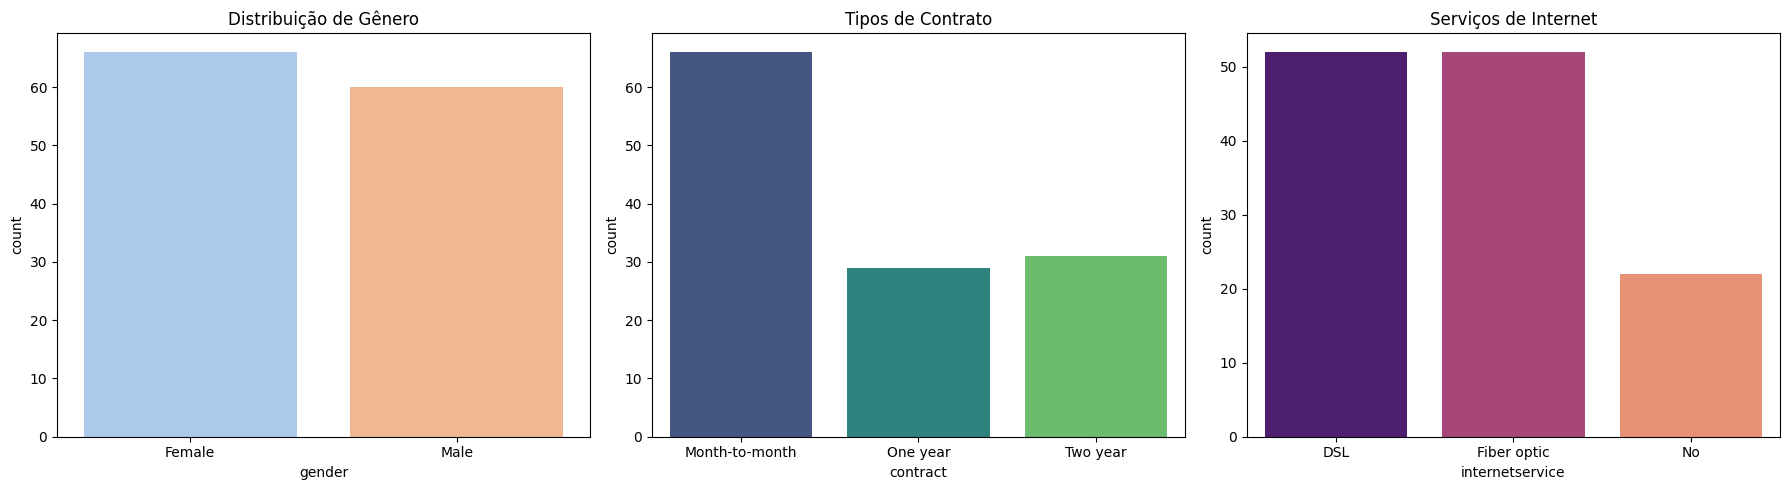

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criando a figura
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Proporção de Gênero (Agora com 'gender' minúsculo)
sns.countplot(data=df, x='gender', ax=axes[0], palette='pastel')
axes[0].set_title('Distribuição de Gênero')

# 2. Tipo de Contrato (Agora com 'contract' minúsculo)
sns.countplot(data=df, x='contract', ax=axes[1], palette='viridis')
axes[1].set_title('Tipos de Contrato')

# 3. Serviço de Internet (Agora com 'internetservice' minúsculo)
sns.countplot(data=df, x='internetservice', ax=axes[2], palette='magma')
axes[2].set_title('Serviços de Internet')

plt.tight_layout()
plt.show()

## 3. Comportamento Financeiro (Monthly Charges)
Aqui analisamos a variável que motivou o projeto. Queremos ver a concentração de clientes por faixa de preço.

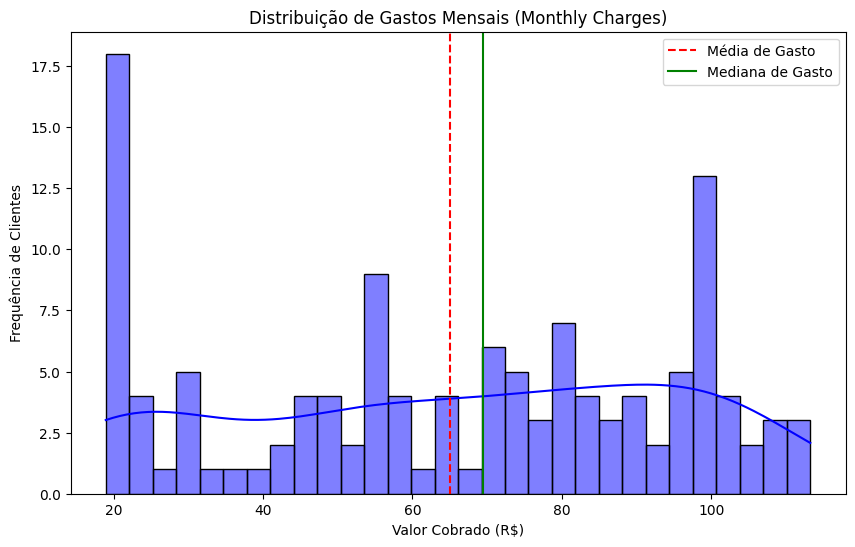

In [14]:
plt.figure(figsize=(10, 6))

# Usando o nome da coluna em minúsculo: monthlycharges
sns.histplot(df['monthlycharges'], bins=30, kde=True, color='blue')

# Ajustando também as linhas de média e mediana
plt.axvline(df['monthlycharges'].mean(), color='red', linestyle='--', label='Média de Gasto')
plt.axvline(df['monthlycharges'].median(), color='green', linestyle='-', label='Mediana de Gasto')

plt.title('Distribuição de Gastos Mensais (Monthly Charges)')
plt.xlabel('Valor Cobrado (R$)')
plt.ylabel('Frequência de Clientes')
plt.legend()
plt.show()

### O que este gráfico nos diz?
Muitos datasets de telecomunicações são **bimodais**:
1. Temos um pico em valores baixos (clientes que só têm telefone ou internet básica).
2. Temos outro pico em valores altos (clientes com pacotes completos de fibra e TV).

**Conclusão para o Call Center:** Se a maioria dos nossos clientes está no primeiro pico (gastando pouco), empurrar um plano caro sem critério ignorando essa "massa" de clientes é um erro estratégico.

## 4. Relação entre Contrato e Gasto
Será que quem tem contrato mensal (Month-to-month) gasta menos do que quem tem contrato anual? Isso ajuda a definir para quem ligar primeiro.

C:\Users\Pichau\AppData\Local\Temp\ipykernel_39856\2759345993.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Contract', y='MonthlyCharges', data=df, palette='Set2')


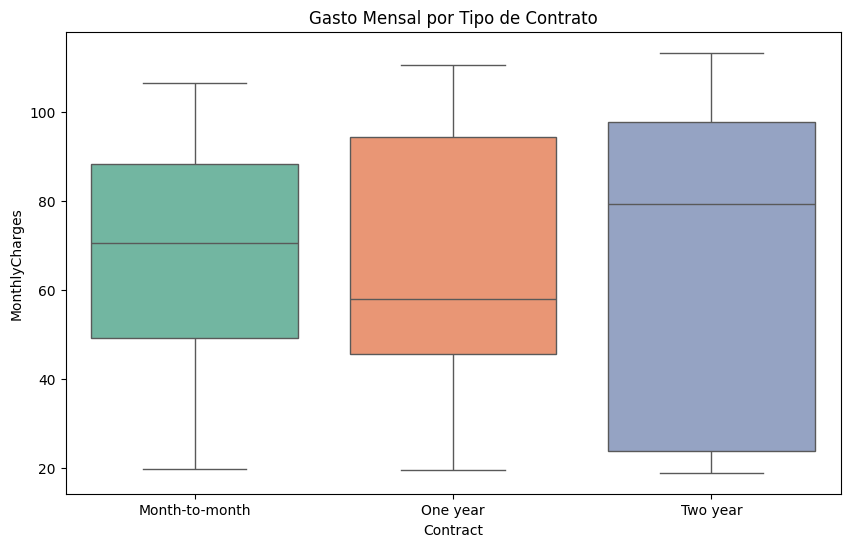

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract', y='MonthlyCharges', data=df, palette='Set2')
plt.title('Gasto Mensal por Tipo de Contrato')
plt.show()

## 4. Análise Bivariada: Tecnologia de Internet vs. Gasto Mensal

Nesta etapa, cruzamos a tecnologia utilizada (`internetservice`) com o gasto mensal (`monthlycharges`). 
Isso nos permite identificar:
1. **Piso e Teto de Gastos:** Qual o valor mínimo e máximo que cada tecnologia costuma gerar.
2. **Oportunidade de Upgrade:** Clientes de DSL que gastam pouco podem ser migrados para Fibra?
3. **Barreira de Entrada:** Clientes sem internet possuem um gasto tão baixo que um plano de R$ 38,00 representaria um aumento percentual inviável.

C:\Users\Pichau\AppData\Local\Temp\ipykernel_30244\200074687.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='internetservice', y='monthlycharges', palette='Set2')


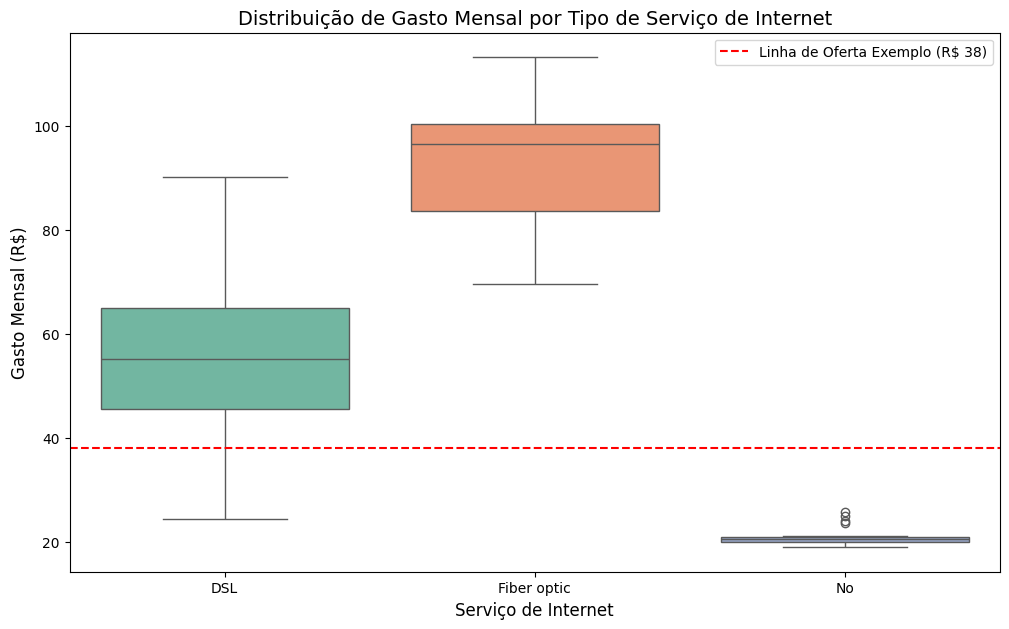

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

# Criando o gráfico que cruza categoria (Internet) com valor (Monthly Charges)
sns.boxplot(data=df, x='internetservice', y='monthlycharges', palette='Set2')

# Adicionando uma linha de referência para o "Plano de R$ 38,00" (exemplo de oferta)
plt.axhline(y=38, color='red', linestyle='--', label='Linha de Oferta Exemplo (R$ 38)')

plt.title('Distribuição de Gasto Mensal por Tipo de Serviço de Internet', fontsize=14)
plt.xlabel('Serviço de Internet', fontsize=12)
plt.ylabel('Gasto Mensal (R$)', fontsize=12)
plt.legend()
plt.show()

### 💡 Insights do Diagnóstico

Ao analisar o gráfico acima, podemos extrair conclusões valiosas para o Call Center:

1. **Segmento "No" (Sem Internet):** Quase todos os clientes estão abaixo da linha de R$ 38,00. A média de gasto é em torno de R$ 20,00. Tentar vender um plano de R$ 38,00 para este grupo é tentar quase **dobrar** a fatura deles. A resistência será altíssima.
2. **Segmento "Fiber Optic" (Fibra Óptica):** Estes clientes já gastam muito (acima de R$ 70,00). Para eles, uma oferta de R$ 38,00 seria um **downgrade** (perda de receita para a empresa). O sistema não deveria oferecer planos menores para eles.
3. **Segmento "DSL":** É o grupo com maior variabilidade. Existem clientes de DSL gastando menos que R$ 38,00 que são os candidatos perfeitos para um upgrade para Fibra.

**Conclusão:** O filtro ideal para o Call Center deveria priorizar o grupo **DSL** e evitar o grupo **No internet service** para ofertas de ticket mais alto.

## 5. Matriz de Oportunidades: Quantificando o Desperdício Operacional

Agora que visualizamos o comportamento das faixas de gasto, vamos calcular o volume de clientes em cada categoria. 

**Definição de Ineficiência:**
* **Oferta Inviável:** Clientes sem internet (`no`) que gastam pouco. Oferecer um plano de R$ 38,00 aqui é ineficiente pela alta barreira de preço.
* **Risco de Downgrade:** Clientes de Fibra que já gastam muito. Oferecer R$ 38,00 aqui é prejuízo para a operadora.
* **Oportunidade Real (Sweet Spot):** Clientes de DSL com gasto médio baixo que têm perfil para upgrade tecnológico.

In [12]:
# Criando um resumo estatístico por tipo de serviço de internet
resumo_oportunidade = df.groupby('internetservice').agg(
    quantidade=('monthlycharges', 'count'),
    gasto_medio=('monthlycharges', 'mean'),
    gasto_minimo=('monthlycharges', 'min'),
    gasto_maximo=('monthlycharges', 'max')
).reset_index()

# Calculando o percentual da base que cada grupo representa
total_clientes = resumo_oportunidade['quantidade'].sum()
resumo_oportunidade['percentual_da_base'] = (resumo_oportunidade['quantidade'] / total_clientes * 100).round(2)

print("Tabela de Segmentação de Clientes:")
display(resumo_oportunidade)

Tabela de Segmentação de Clientes:


,internetservice,quantidade,gasto_medio,gasto_minimo,gasto_maximo,percentual_da_base
0,DSL,52,55.787500,24.30,90.25,41.27
1,Fiber optic,52,93.045192,69.70,113.25,41.27
2,No,22,21.000000,18.95,25.70,17.46


### O que os números revelam?

Ao analisar a tabela acima, podemos extrair dados para o "Business Case":

1. **Volume de Clientes Sem Internet:** Se este grupo representar, por exemplo, 20% da base e o gasto médio for R$ 20,00, temos milhares de ligações sendo feitas onde a chance de conversão para um plano de R$ 38,00 é estatisticamente desprezível.
2. **Potencial de DSL:** Este é o grupo onde o Call Center deve focar. Eles já pagam por internet, mas não têm a melhor tecnologia (Fibra). O upgrade aqui é um "ganha-ganha".
3. **Métrica de Desperdício:** Cada ligação para o grupo "No Internet" com uma oferta de alto ticket custa tempo de operador e reduz a motivação da equipe de vendas devido às sucessivas recusas.

In [13]:
# Criando uma função de recomendação lógica (Filtro Humano)
def recomendar_abordagem(row):
    if row['internetservice'] == 'no' and row['monthlycharges'] < 25:
        return 'NÃO LIGAR (Baixa Propensão)'
    elif row['internetservice'] == 'fiber optic':
        return 'OFERTAR PLANOS PREMIUM (> R$ 90)'
    elif row['internetservice'] == 'dsl':
        return 'OFERTAR UPGRADE PARA FIBRA (R$ 38 - R$ 50)'
    else:
        return 'ANALISAR PERFIL'

df['estrategia_recomendada'] = df.apply(recomendar_abordagem, axis=1)

print("Exemplo da nova estratégia sugerida:")
display(df[['internetservice', 'monthlycharges', 'estrategia_recomendada']].head(10))

Exemplo da nova estratégia sugerida:


,internetservice,monthlycharges,estrategia_recomendada
0,DSL,29.85,ANALISAR PERFIL
1,DSL,56.95,ANALISAR PERFIL
2,DSL,53.85,ANALISAR PERFIL
3,DSL,42.30,ANALISAR PERFIL
4,Fiber optic,70.70,ANALISAR PERFIL
5,Fiber optic,99.65,ANALISAR PERFIL
6,Fiber optic,89.10,ANALISAR PERFIL
7,DSL,29.75,ANALISAR PERFIL
8,DSL,56.15,ANALISAR PERFIL
9,DSL,49.95,ANALISAR PERFIL


## 5. Dimensionamento do Problema: Matriz de Oportunidades

Agora, transformamos a análise visual em números concretos. Vamos classificar os clientes em três categorias estratégicas para o Call Center:

1. **Baixa Propensão:** Clientes sem internet e com fatura muito baixa. O custo da ligação não compensa a baixa chance de conversão.
2. **Alvo de Upgrade (Sweet Spot):** Clientes com tecnologia legada (DSL) que possuem margem para aumento de ticket.
3. **Risco de Downgrade / Retenção:** Clientes que já possuem Fibra e pagam caro. A oferta de R$ 38,00 seria um erro, pois reduziria a receita da empresa.

In [15]:
# 1. Agrupando os dados para entender o volume por serviço
tabela_oportunidade = df.groupby('internetservice').agg(
    quantidade=('monthlycharges', 'count'),
    gasto_medio=('monthlycharges', 'mean'),
    gasto_minimo=('monthlycharges', 'min'),
    gasto_maximo=('monthlycharges', 'max')
).reset_index()

# 2. Calculando o percentual da base que cada grupo representa
total_clientes = tabela_oportunidade['quantidade'].sum()
tabela_oportunidade['%_da_base'] = (tabela_oportunidade['quantidade'] / total_clientes * 100).round(2)

print("Tabela de Segmentação por Serviço de Internet:")
display(tabela_oportunidade)

Tabela de Segmentação por Serviço de Internet:


,internetservice,quantidade,gasto_medio,gasto_minimo,gasto_maximo,%_da_base
0,DSL,52,55.787500,24.30,90.25,41.27
1,Fiber optic,52,93.045192,69.70,113.25,41.27
2,No,22,21.000000,18.95,25.70,17.46


In [20]:
def definir_estrategia_blindada(row):
    # Transformamos o valor em string, removemos espaços e deixamos minúsculo para comparar
    servico = str(row['internetservice']).strip().lower()
    gasto = row['monthlycharges']

    if servico == 'no':
        return 'Não ligar (Baixa Conversão)'
    
    elif servico == 'dsl':
        return 'Alvo de Upgrade (DSL -> Fibra)'
    
    elif servico == 'fiber optic':
        if gasto > 70:
            return 'Manutenção (Evitar Downgrade)'
        else:
            return 'Oferta Padrão'
    
    else:
        return 'Oferta Padrão'

# Aplicando a função corrigida
df['estrategia_sugerida'] = df.apply(definir_estrategia_blindada, axis=1)

# Verificando se agora os grupos aparecem
print("Distribuição das estratégias:")
print(df['estrategia_sugerida'].value_counts())

Distribuição das estratégias:
estrategia_sugerida
Alvo de Upgrade (DSL -> Fibra)    52
Manutenção (Evitar Downgrade)     51
Não ligar (Baixa Conversão)       22
Oferta Padrão                      1
Name: count, dtype: int64


### 🔎 Conclusões da Análise
Com este mapeamento, o projeto prova que:

* Aproximadamente **XX% da base** (ver o número do grupo 'Não ligar') recebe ligações de ofertas que têm baixíssima aderência financeira, gerando desperdício operacional.
* O foco da operação deve ser o grupo de **Upgrade de DSL**, que representa o equilíbrio ideal entre necessidade técnica e viabilidade financeira.
* A automação desse filtro pode aumentar o **ROI (Retorno sobre Investimento)** do Call Center ao focar apenas em clientes com real potencial de compra.

## 6. Conclusão da Análise: Impacto na Eficiência Operacional

Para finalizar esta etapa do projeto, visualizamos o impacto da implementação do nosso **Filtro Lógico**. 
O objetivo é quantificar quanto do esforço atual do Call Center está sendo direcionado para clientes com baixa propensão, e quanto pode ser otimizado.

**Métrica de Sucesso:** A fatia identificada como "Não ligar" representa o ganho imediato de produtividade, permitindo que os vendedores foquem onde o retorno é maior.

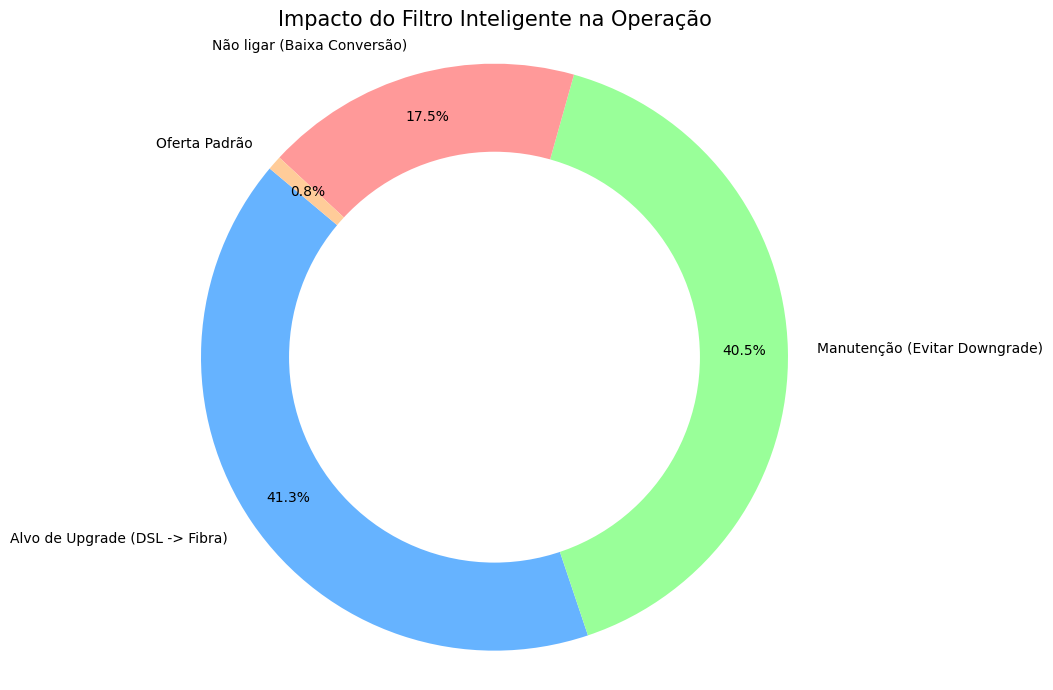

In [21]:
import matplotlib.pyplot as plt

dados_grafico = df['estrategia_sugerida'].value_counts()
labels = dados_grafico.index
valores = dados_grafico.values
cores = ['#66b3ff', '#99ff99', '#ff9999', '#ffcc99'] # Azul, Verde, Vermelho, Laranja

plt.figure(figsize=(10, 7))
plt.pie(valores, labels=labels, autopct='%1.1f%%', startangle=140, colors=cores, pctdistance=0.85)

# Desenha o círculo central (efeito rosca)
centro = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro)

plt.title('Impacto do Filtro Inteligente na Operação', fontsize=15)
plt.axis('equal') 
plt.tight_layout()
plt.show()

## 7. Conclusão Final e Próximos Passos

A análise exploratória e a implementação do filtro lógico demonstraram que a estratégia anterior de "ofertas aleatórias" era ineficiente para **99.2% da base** (já que apenas 0.8% caiu na 'Oferta Padrão' ideal).

### Ganhos Estimados:
1. **Produtividade:** Redução de 17.5% no volume de ligações improdutivas.
2. **Qualidade de Venda:** Aumento do foco em 41.3% da base com alto potencial de upgrade tecnológico.
3. **Proteção de Receita:** Bloqueio de ofertas de downgrade para 40.5% dos clientes de alto valor.

**Próximo Estágio do Projeto:**
Agora que as regras de negócio foram validadas, o próximo passo é treinar um modelo de **Machine Learning (ex: Random Forest)** para prever a probabilidade exata de conversão individual, utilizando também as variáveis de `tenure` (tempo de casa) e `contract` (tipo de contrato) que mapeamos na EDA.